In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
print('Sex         : ', data.Sex.unique())
print('BP          : ', data.BP.unique())
print('Cholesterol : ', data.Cholesterol.unique())
print('Drugs       : ', data.Drug.unique())

Sex         :  ['F' 'M']
BP          :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drugs       :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

---

<AxesSubplot:xlabel='Drug', ylabel='count'>

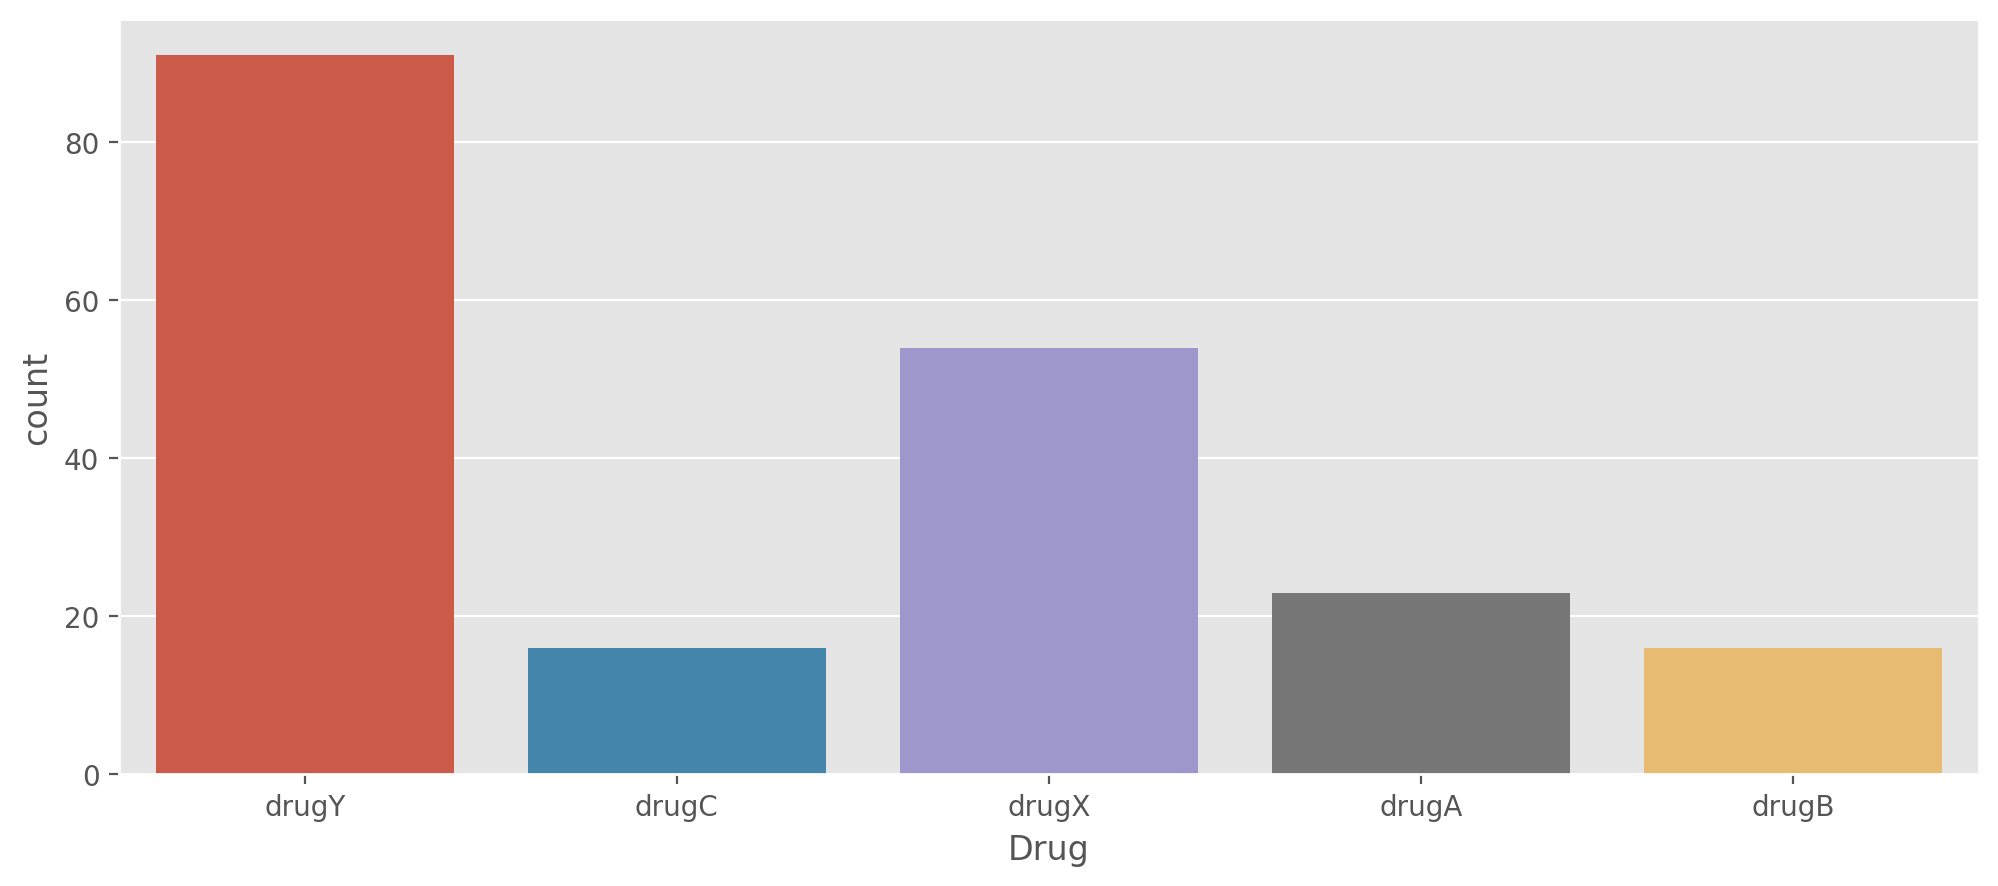

In [7]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', data = data)

In [8]:
data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

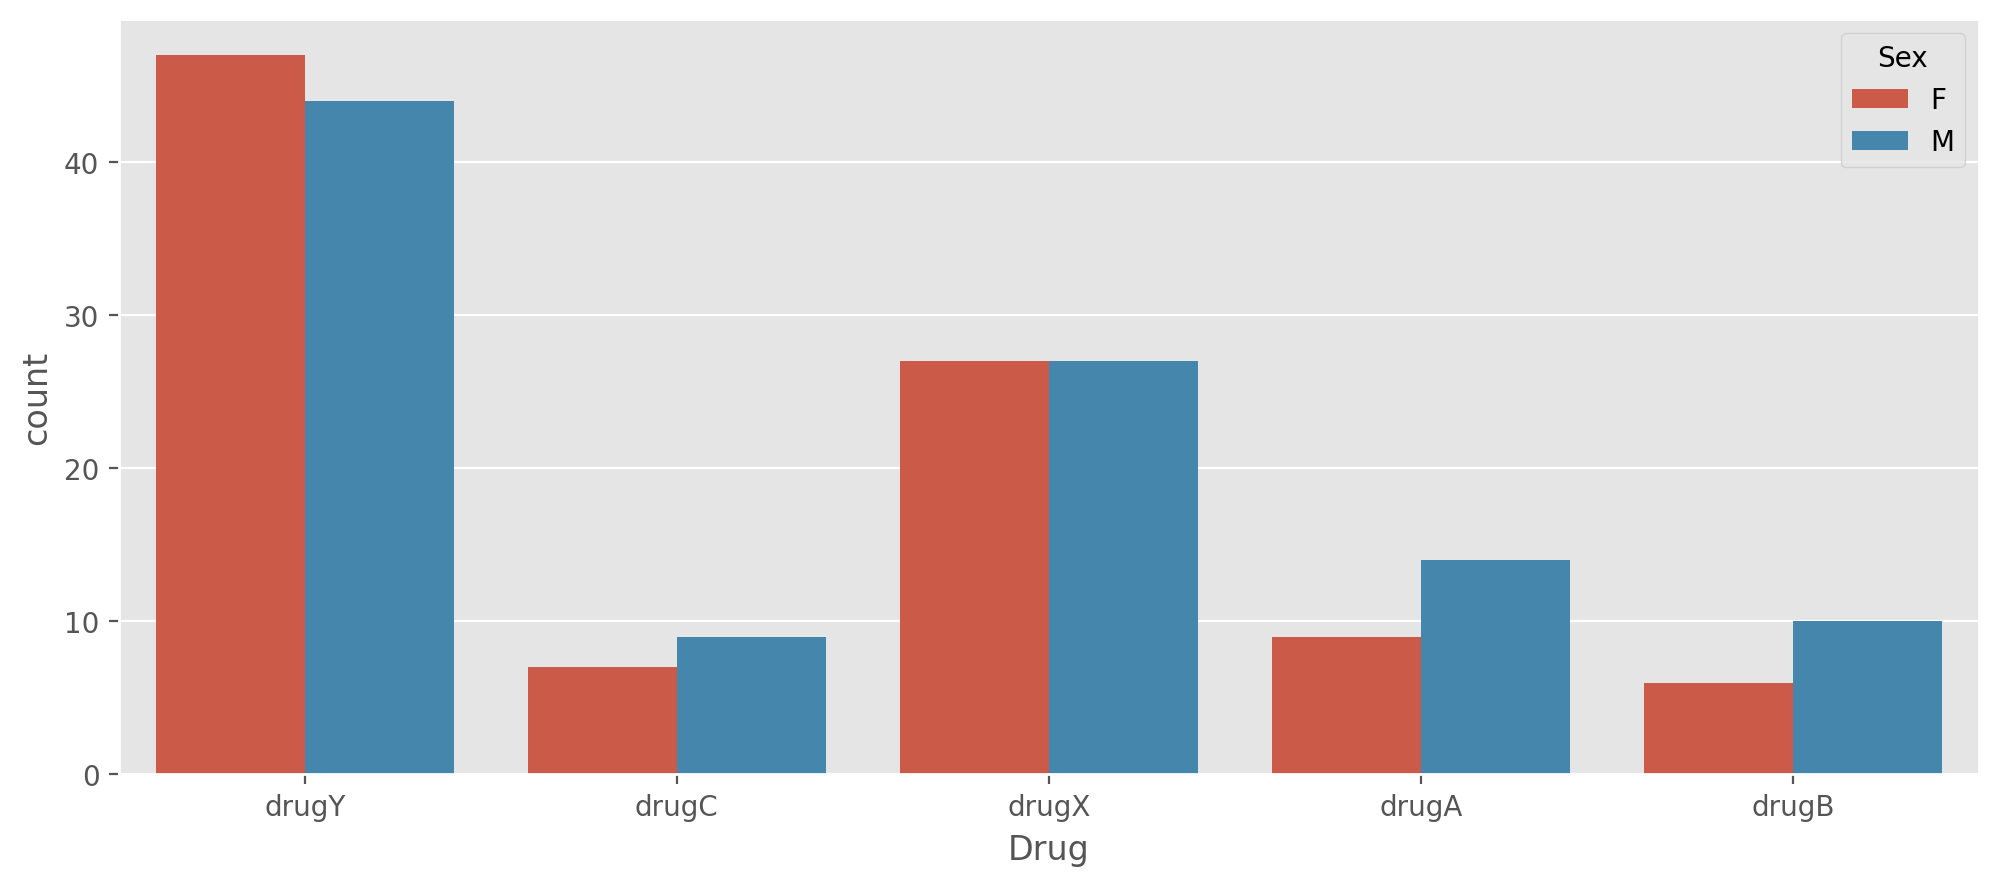

In [9]:
# Sex and Drug
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', hue = 'Sex', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

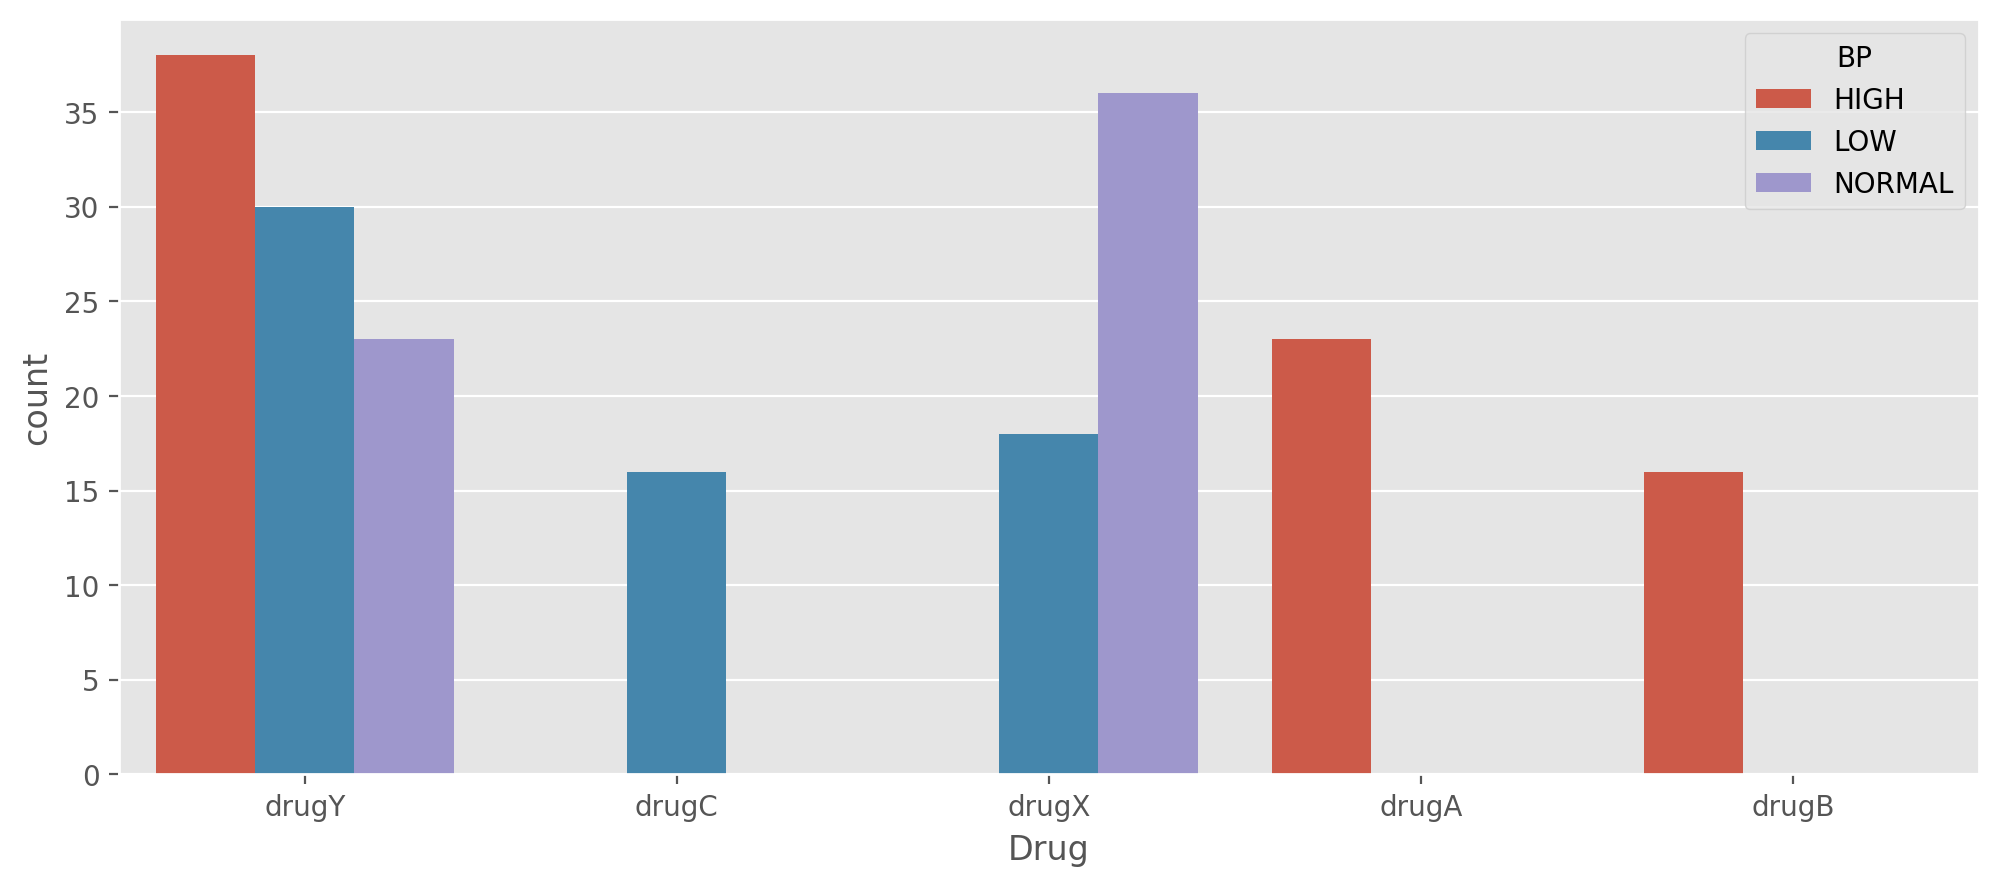

In [10]:
# BP and Drug
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', hue = 'BP', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

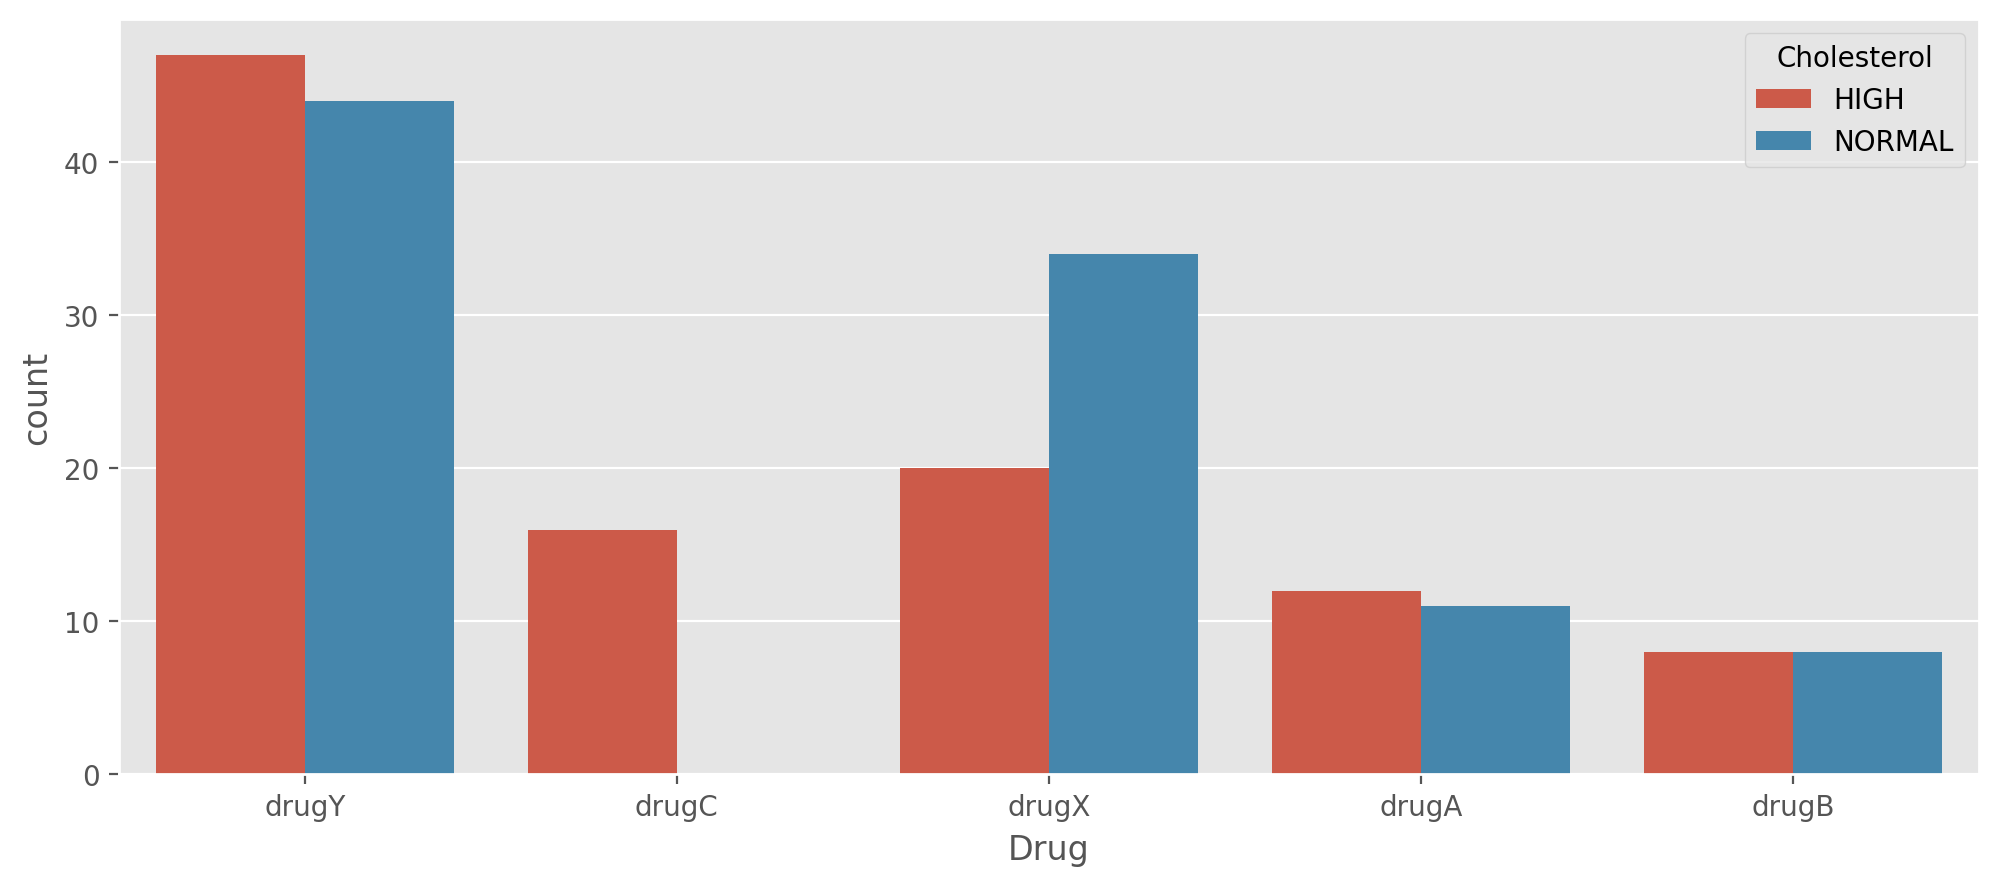

In [11]:
# Cholesterol and Drug
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Drug', hue = 'Cholesterol', data = data)

<AxesSubplot:ylabel='Age'>

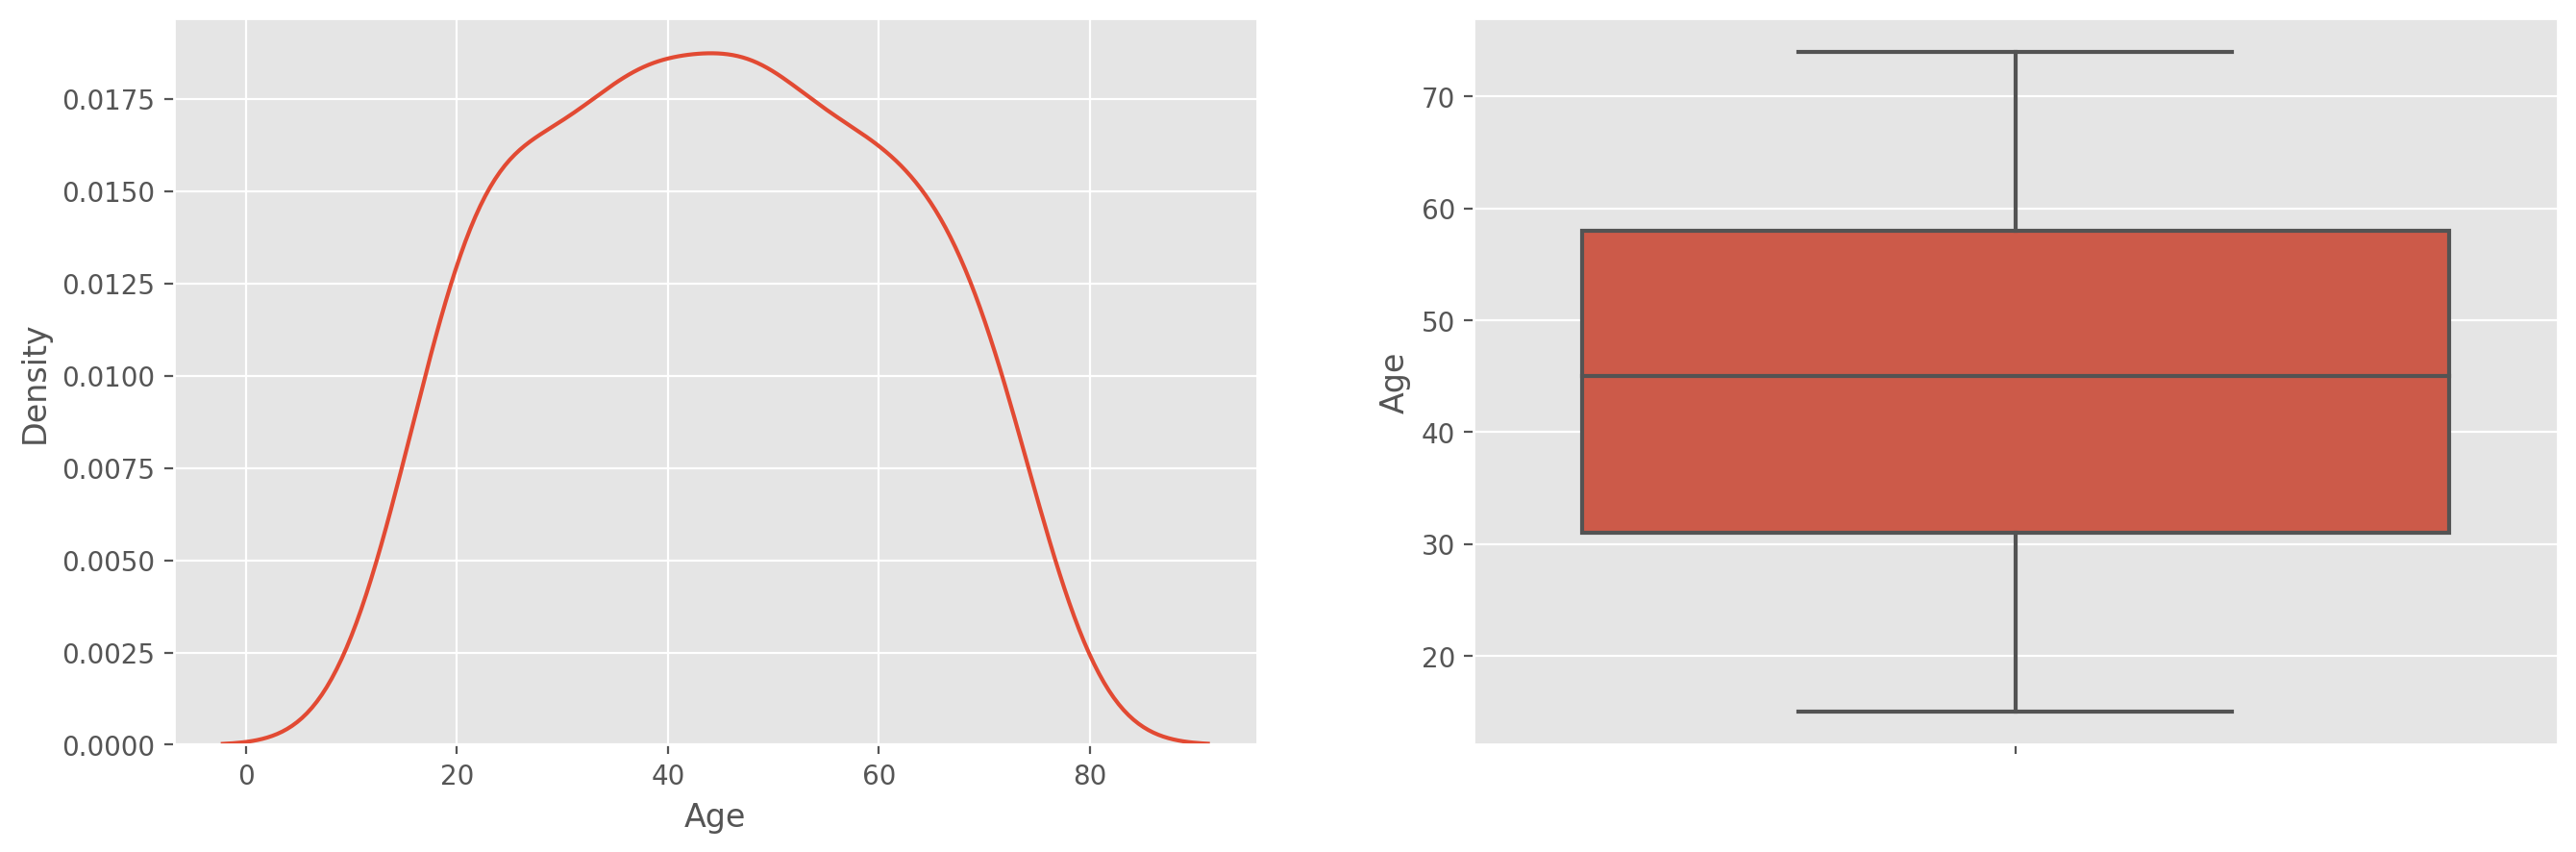

In [15]:
# Age
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(data['Age'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data['Age'])

<AxesSubplot:xlabel='Drug', ylabel='Age'>

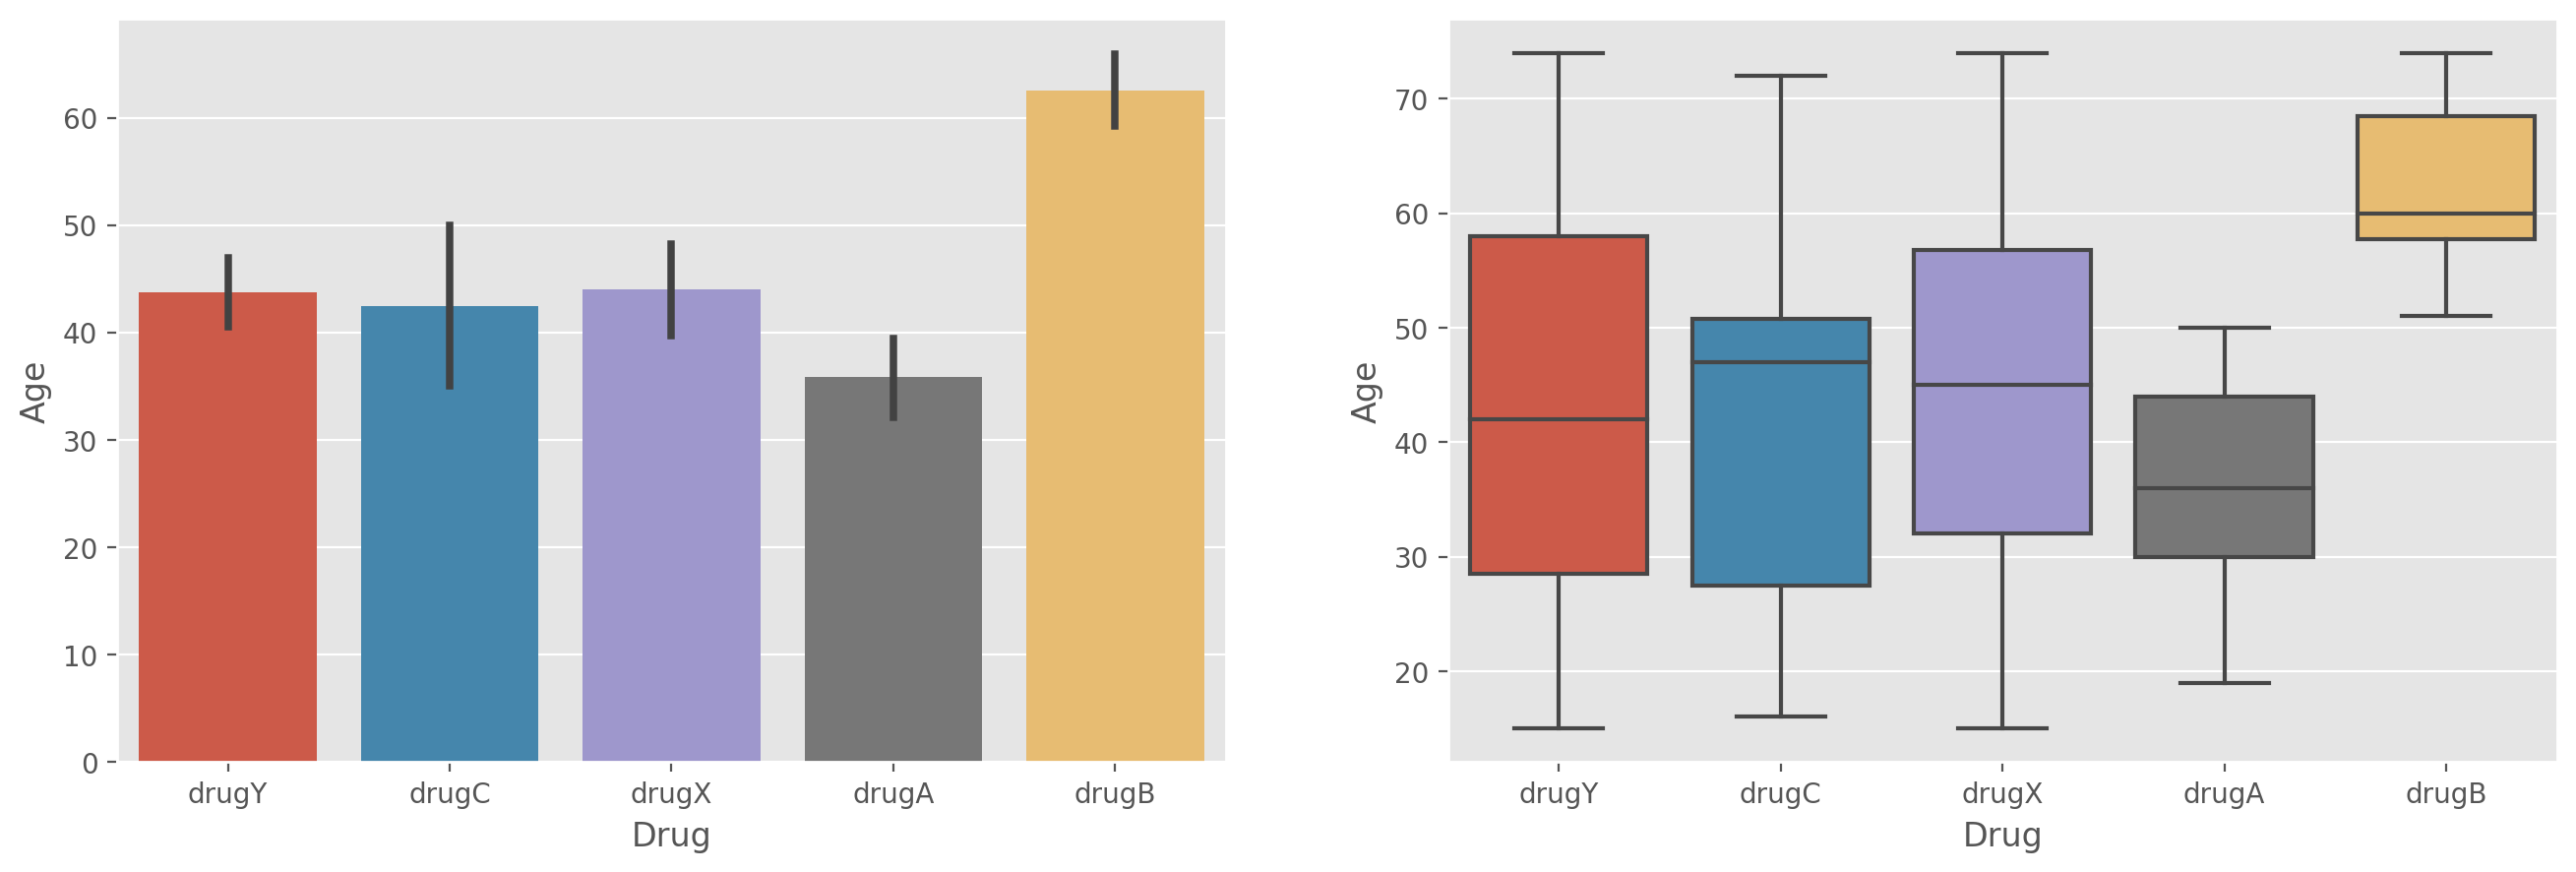

In [16]:
# Age and Drug
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Drug', 'Age', data = data)
plt.subplot(1,2,2)
sns.boxplot('Drug', 'Age', data = data)

<AxesSubplot:ylabel='Na_to_K'>

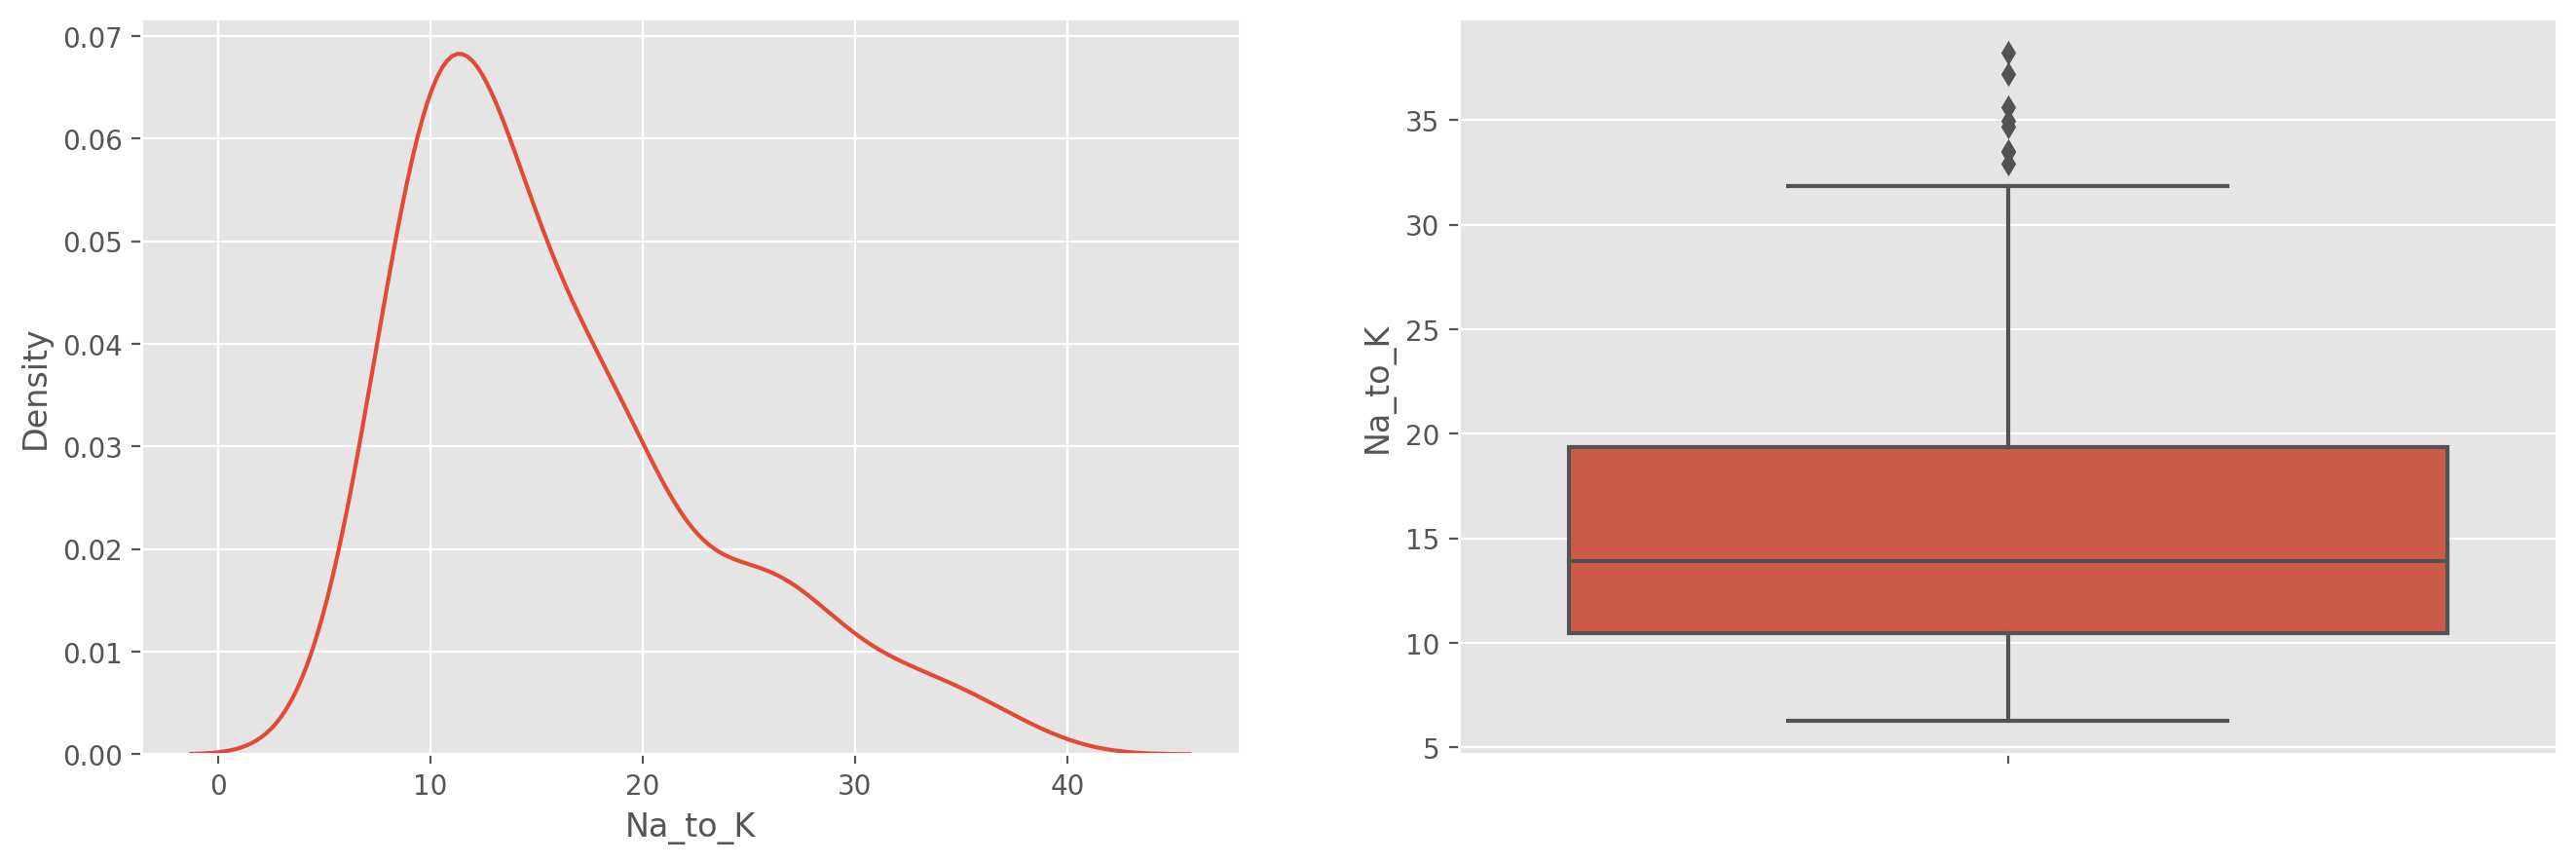

In [17]:
# Na_to_K
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(data['Na_to_K'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

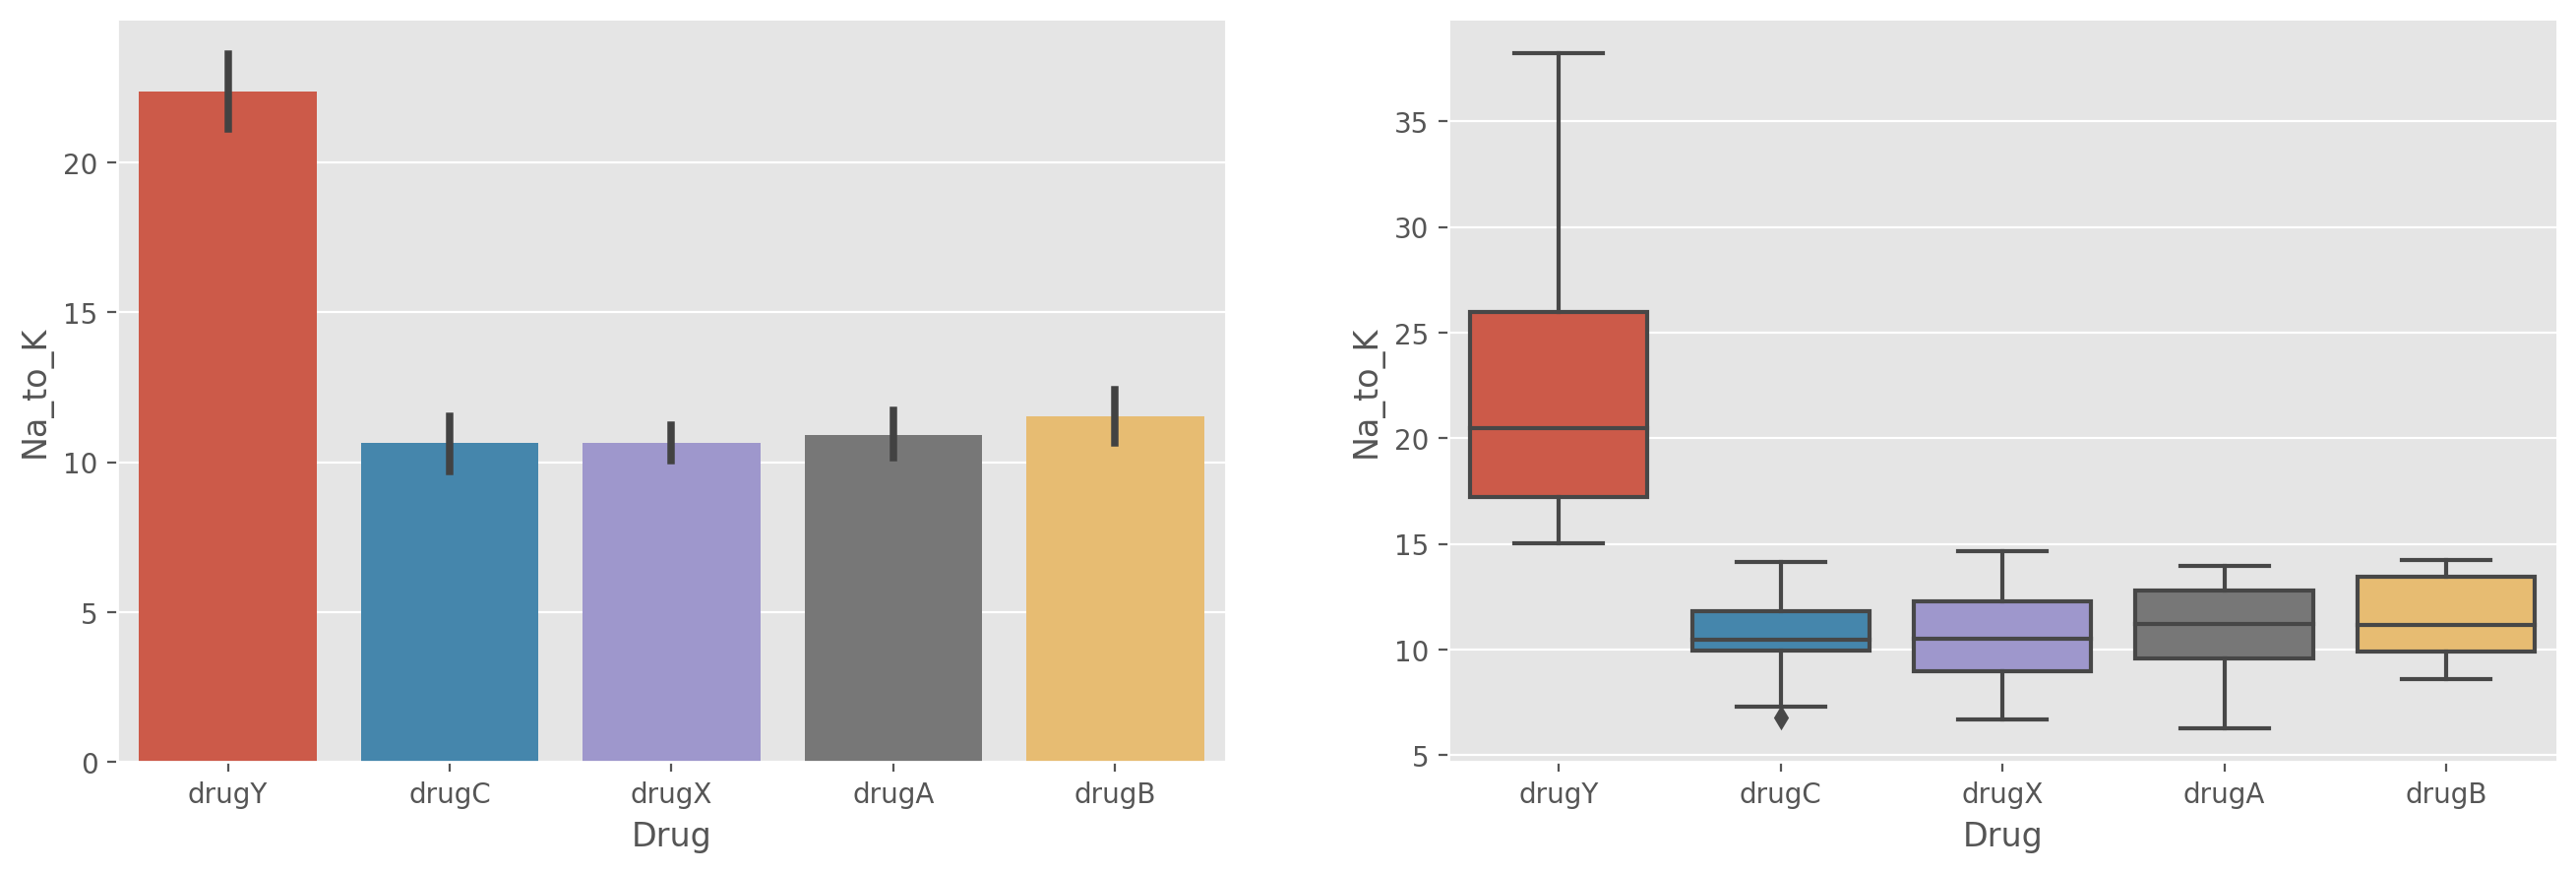

In [18]:
# Na_to_K ands Drug
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Drug', 'Na_to_K', data = data)
plt.subplot(1,2,2)
sns.boxplot('Drug', 'Na_to_K', data = data)

---
----

In [19]:
cols = ['BP', 'Cholesterol', 'Sex', 'Age', 'Na_to_K']
X = data[cols]
Y = data[['Drug']]

print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (200, 5)
Dependent Feature Shape       :  (200, 1)


In [20]:
X.head()

,BP,Cholesterol,Sex,Age,Na_to_K
0,HIGH,HIGH,F,23,25.355
1,LOW,HIGH,M,47,13.093
2,LOW,HIGH,M,47,10.114
3,NORMAL,HIGH,F,28,7.798
4,LOW,HIGH,F,61,18.043


In [21]:
Y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [22]:
# Encoding
X.Sex = X.Sex.map({'M': 0, 'F': 1})
X.Cholesterol = X.Cholesterol.map({'NORMAL': 0, 'HIGH': 1})
X.BP = X.BP.map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})

X.head(10)

,BP,Cholesterol,Sex,Age,Na_to_K
0,2,1,1,23,25.355
1,0,1,0,47,13.093
2,0,1,0,47,10.114
3,1,1,1,28,7.798
4,0,1,1,61,18.043
5,1,1,1,22,8.607
6,1,1,1,49,16.275
7,0,1,0,41,11.037
8,1,1,0,60,15.171
9,0,0,0,43,19.368


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [24]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (160, 5)
Training Labels Shape :  (160, 1)
Testing Data Shape    :  (40, 5)
Testing Labels Shape  :  (40, 1)


---
---

In [27]:
# Training The Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Evaluate the model
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.83125
Testing Set Accuracy  :  0.825


In [29]:
x_test[:5]

,BP,Cholesterol,Sex,Age,Na_to_K
119,2,1,1,61,25.475
77,2,0,1,26,19.161
148,0,0,1,61,7.340
149,0,1,0,22,8.151
154,0,0,0,37,16.724


In [30]:
classifier.predict(x_test[:5])

array(['drugY', 'drugY', 'drugX', 'drugA', 'drugY'], dtype=object)

In [32]:
# Training A decision tree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
# Evaluate the model
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  1.0
